In [1]:
import pandas as pd
import sys
sys.path.append('../')
from utils_eda import *

## Load corpora

In [2]:
train = pd.read_json('../datasets/train/mushroom.fr-train_nolabel.v1.jsonl', lines = True)
val = pd.read_json('../datasets/val/mushroom.fr-val.v2.jsonl', lines = True)
sample = pd.read_json('../datasets/sample/sample_set.v1.json', lines = True)

## Dataset overview and distribution analysis

### Example observations

In [3]:
train.head()

,lang,model_input,model_id,model_output_tokens,model_output_logits,model_output_text
0,FR,Quelle est la capitale du district de Farrukha...,mistralai/Mistral-Nemo-Instruct-2407,"[La, Ġcapitale, Ġdu, Ġdistrict, Ġde, ĠFar, ruk...","[19.5487880707, 22.337644577, 22.2163295746, 2...",La capitale du district de Farrukhabad est la ...
1,FR,Quelle figure historique est parfois associée ...,mistralai/Mistral-Nemo-Instruct-2407,"[La, Ġfigure, Ġhistorique, Ġqui, Ġest, Ġparfoi...","[19.2564468384, 18.3479347229, 21.8952636719, ...",La figure historique qui est parfois associée ...
2,FR,À quelle société de doublage a été confiée l’a...,bofenghuang/vigogne-2-13b-chat,"[▁La, ▁série, ▁White, ▁Col, lar, ▁a, ▁été, ▁do...","[17.7801818848, 18.5708408356, 18.2730712891, ...",La série White Collar a été doublée en françai...
3,FR,Pour quelle raison le stade Red Bull à Salzbou...,bofenghuang/vigogne-2-13b-chat,"[▁Le, ▁st, ade, ▁Red, ▁Bull, ▁Sal, z, bourg, ▁...","[17.674446106, 16.9351539612, 27.2531871796, 1...",Le stade Red Bull Salzbourg a été réaménagé po...
4,FR,Chance the Rapper s’est-t-il déjà produit au s...,bofenghuang/vigogne-2-13b-chat,"[▁Non, ,, ▁Ch, ance, ▁the, ▁R, apper, ▁n, ', a...","[14.7068004608, 17.7879562378, 16.8708057404, ...","Non, Chance the Rapper n'a jamais joué au Stad..."


In [4]:
val.head()

,id,lang,model_input,model_output_text,model_id,soft_labels,hard_labels,model_output_logits,model_output_tokens
0,val-fr-1,FR,En quoi le royaume suève et le royaume de Gali...,Le Royaume de Galice et le Royaume suève n'ont...,bofenghuang/vigogne-2-13b-chat,"[{'start': 0, 'prob': 0.33333333330000003, 'en...","[[41, 65], [219, 220], [258, 269], [270, 287],...","[17.2074718475, 17.2078914642, 25.1593875885, ...","[▁Le, ▁Ro, yaume, ▁de, ▁Gal, ice, ▁et, ▁le, ▁R..."
1,val-fr-2,FR,À quelle société de doublage a été confiée l’a...,La série White Collar a été doublée en françai...,occiglot/occiglot-7b-eu5-instruct,"[{'start': 75, 'prob': 1.0, 'end': 88}]","[[75, 88]]","[16.2417583466, 22.4181919098, 22.1100273132, ...","[La, ▁série, ▁White, ▁Coll, ar, ▁a, ▁été, ▁dou..."
2,val-fr-3,FR,Pour quelle raison le stade Red Bull à Salzbou...,Le stade Red Bull à Salzbourg a été réaménagé ...,mistralai/Mistral-Nemo-Instruct-2407,"[{'start': 70, 'prob': 0.33333333330000003, 'e...","[[98, 437], [520, 550]]","[21.8362941742, 22.6757774353, 20.9070243835, ...","[Le, Ġstade, ĠRed, ĠBull, ĠÃł, ĠSalz, bourg, Ġ..."
3,val-fr-4,FR,Chance the Rapper s’est-t-il déjà produit au s...,"Oui, Chance the Rapper a joué au Stade de Fran...",bofenghuang/vigogne-2-13b-chat,"[{'start': 25, 'prob': 0.33333333330000003, 'e...","[[57, 60], [72, 224]]","[16.8683815002, 22.8995819092, 19.6399459839, ...","[▁O, ui, ,, ▁Ch, ance, ▁the, ▁R, apper, ▁a, ▁j..."
4,val-fr-5,FR,Quelles positions peuvent être adoptées lors d...,Il existe plusieurs positions qui peuvent être...,meta-llama/Meta-Llama-3.1-8B-Instruct,"[{'start': 238, 'prob': 0.33333333330000003, '...","[[246, 254], [286, 365], [430, 470], [472, 665...","[22.2187690735, 25.1160564423, 23.5275001526, ...","[Il, Ġexiste, Ġplusieurs, Ġpositions, Ġqui, Ġp..."


In [5]:
sample.head()

,id,lang,model_input,model_output_text,model_id,soft_labels,hard_labels
0,1,EN,When was the restoration of the Sándor Palace ...,"The restoration of Sándor Palace, also known ...",TheBloke/Mistral-7B-Instruct-v0.2-GGUF,"[{'start': 33, 'prob': 0.33333333330000003, 'e...","[[53, 64], [151, 164], [165, 210], [211, 225],..."
1,3,EN,Did the Scotland team debut in the UEFA Euro 1...,"Yes, Scotland made their debut in the UEFA Eu...",TheBloke/Mistral-7B-Instruct-v0.2-GGUF,"[{'start': 1, 'prob': 0.6666666667000001, 'end...","[[1, 4], [49, 53], [87, 103], [232, 246], [262..."
2,4,FR,Contre quelles équipes l'Azerbaïdjan a-t-il ét...,L'équipe d'Azerbaïdjan n'a pas participé à l'...,TheBloke/Mistral-7B-Instruct-v0.2-GGUF,"[{'start': 1, 'prob': 0.33333333330000003, 'en...","[[24, 55], [60, 162], [213, 320]]"
3,8,FR,8437 Bernicla est-il un objet transneptunien ?,8437 Bernicla est-il un objet transneptunien?\...,meta-llama/Meta-Llama-3-8B-Instruct,"[{'start': 46, 'prob': 0.33333333330000003, 'e...","[[71, 86], [90, 94], [184, 193], [269, 437], [..."
4,9,EN,Over which state did Xiong Ai rule?,Xiong Ai was a Chinese warlord who lived duri...,TheBloke/Mistral-7B-Instruct-v0.2-GGUF,"[{'start': 10, 'prob': 0.33333333330000003, 'e...","[[24, 31], [42, 48], [75, 87], [92, 123], [140..."


### Dataset size and structure

- `lang`:
- `model_input`:
- `model_id`:
- `model_output_tokens`:
- `model_output_logits`:
- `model_output_text`:


In [6]:
train.info(), val.info() # unlabelled training set, labelled val set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   lang                 1850 non-null   object
 1   model_input          1850 non-null   object
 2   model_id             1850 non-null   object
 3   model_output_tokens  1850 non-null   object
 4   model_output_logits  1850 non-null   object
 5   model_output_text    1850 non-null   object
dtypes: object(6)
memory usage: 86.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   50 non-null     object
 1   lang                 50 non-null     object
 2   model_input          50 non-null     object
 3   model_output_text    50 non-null     object
 4   model_id             50 non-null     object
 5   soft_labels

(None, None)

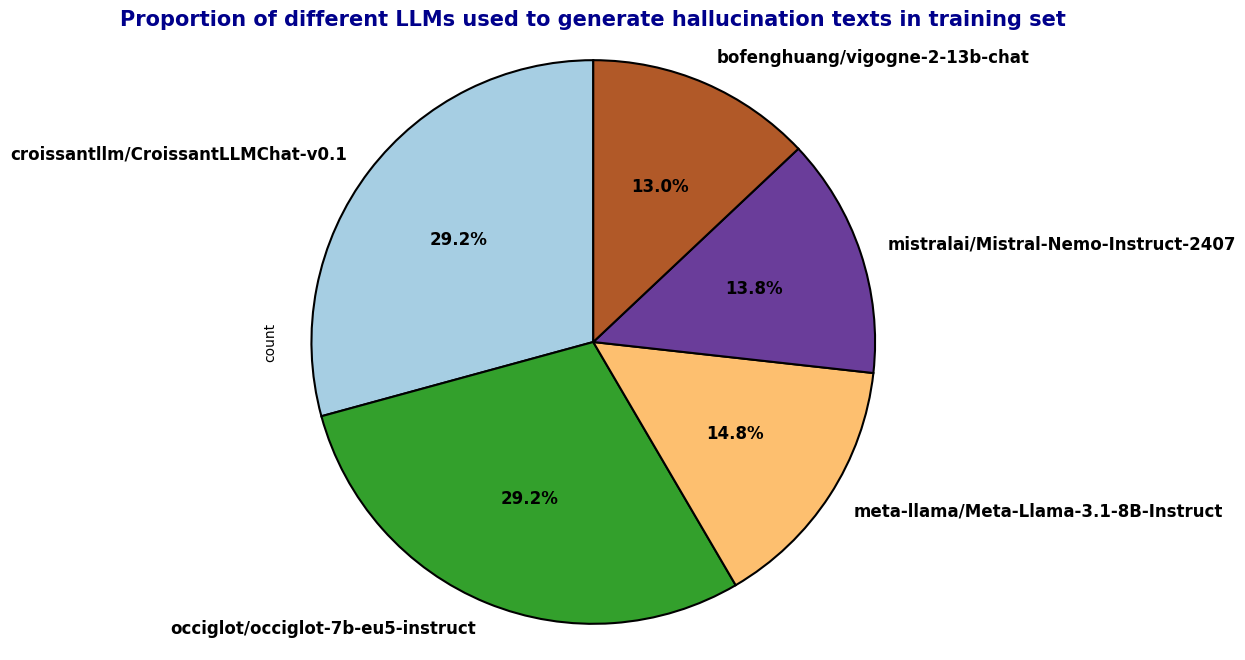

In [7]:
plot_pie_chart(train.model_id, 'Proportion of different LLMs used to generate hallucination texts in training set')

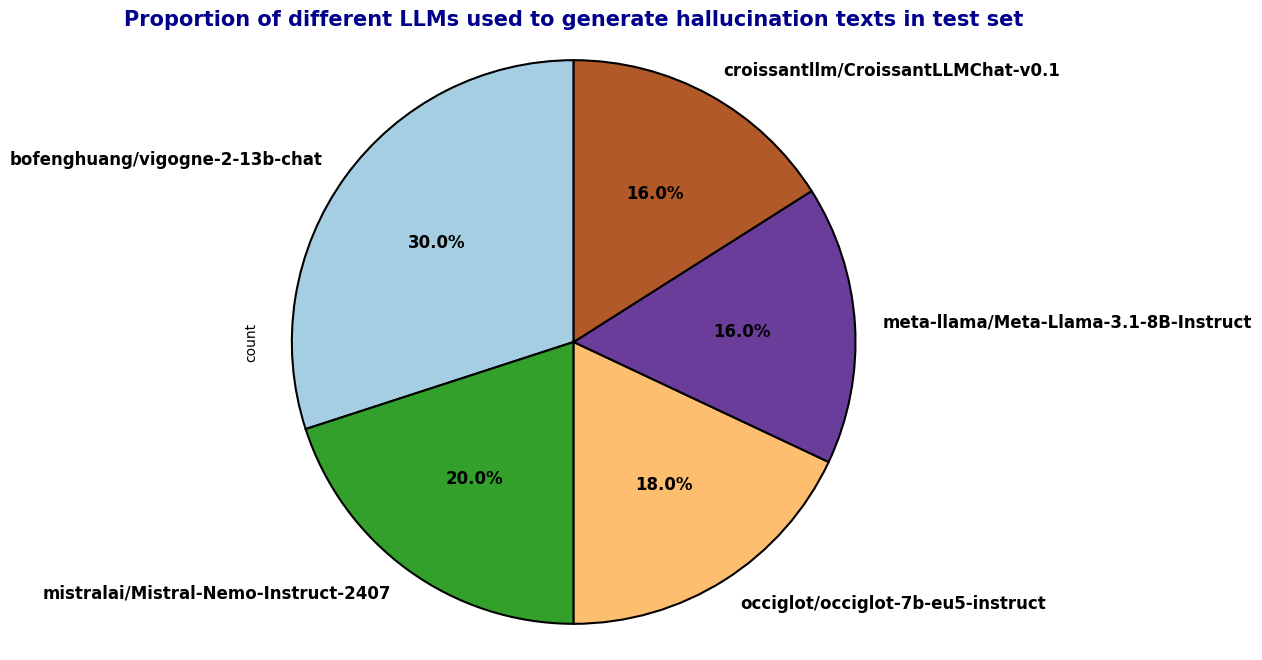

In [8]:
plot_pie_chart(val.model_id, 'Proportion of different LLMs used to generate hallucination texts in test set')

### Distribution of text length

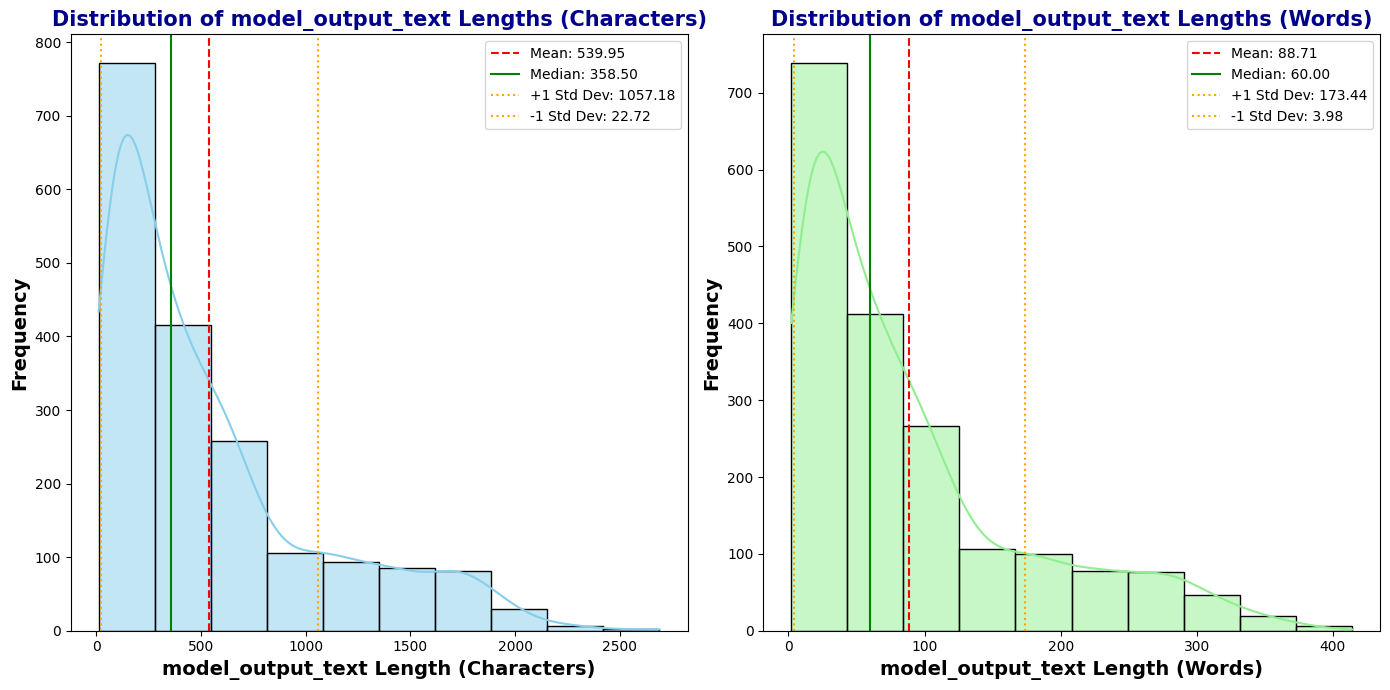

Character-based stats: Mean = 539.95, Median = 358.50, Std Dev = 517.23
Word-based stats: Mean = 88.71, Median = 60.00, Std Dev = 84.73


In [9]:
plot_distribution_text_length(train['model_output_text'], 'Training set')

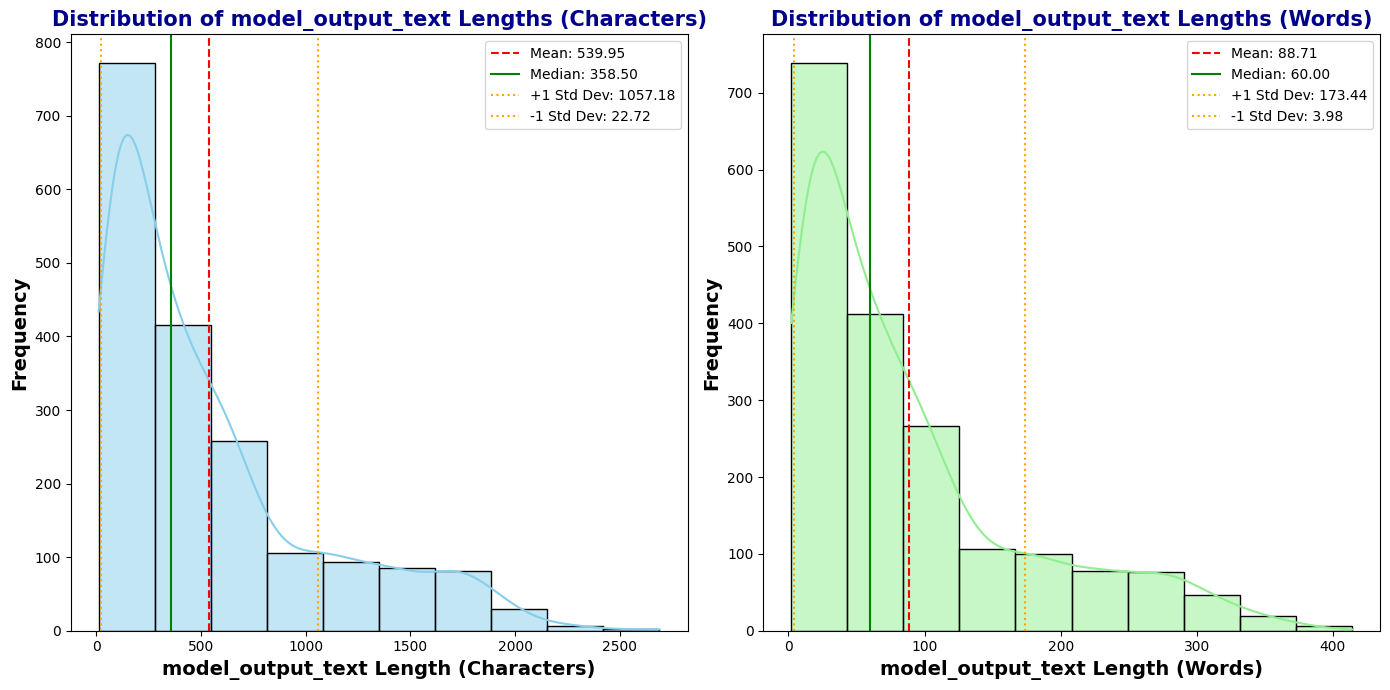

Character-based stats: Mean = 539.95, Median = 358.50, Std Dev = 517.23
Word-based stats: Mean = 88.71, Median = 60.00, Std Dev = 84.73


In [10]:
plot_distribution_text_length(train['model_output_text'], 'Val set')

### Labelled val set analysis

In [11]:
val.model_output_text.iloc[0]

"Le Royaume de Galice et le Royaume suève n'ont pas de lien direct. Cependant, le royaume de Galice est une région historique située dans le nord-ouest de l'Espagne, et elle a une longue histoire et une culture distinctes. Le royaume de Galice a été fondé au VIIe siècle par les Wisigoths, qui ont été précédés par les Romains et les Celtes.\n\nLe Royaume Suève est un ancien royaume celte situé dans la péninsule ibérique, qui a existé entre le IIIe siècle av. J.-C. et le IVe siècle apr. J.-C. Les Suèves étaient un peuple celte qui ont migré en Hispanie (l'actuelle Espagne) et ont établi un royaume dans la région du nord-ouest de l'Espagne.\n\nEn résumé, le lien entre le Royaume de Galice et le Royaume suève réside dans leur histoire et leur culture, car les deux régions ont été habitées par des peuples celtiques qui ont laissé une empreinte culturelle durable dans la région. Cependant, il convient de noter qu'il y a plusieurs siècles entre la période du royaume suève et la fondation du r

In [12]:
val.model_id.value_counts()

model_id
bofenghuang/vigogne-2-13b-chat           15
mistralai/Mistral-Nemo-Instruct-2407     10
occiglot/occiglot-7b-eu5-instruct         9
meta-llama/Meta-Llama-3.1-8B-Instruct     8
croissantllm/CroissantLLMChat-v0.1        8
Name: count, dtype: int64

In [13]:
print(val.model_input.iloc[1])
print(val.model_output_text.iloc[1])
print(val.hard_labels.iloc[1])

À quelle société de doublage a été confiée l’adaptation en français de la série White Collar?
La série White Collar a été doublée en français par la société de doublage Lylo Doublage.<|im_end|> 

[[75, 88]]


In [14]:
# Extract hallucinated spans
text = val.model_output_text.iloc[1]
position = val.hard_labels.iloc[1]
hallucinated_texts = [text[start:end] for start, end in position]

# Print the extracted hallucinated spans
for idx, hallucination in enumerate(hallucinated_texts):
    print(f"Hallucination {idx + 1}: {hallucination}")

Hallucination 1: Lylo Doublage


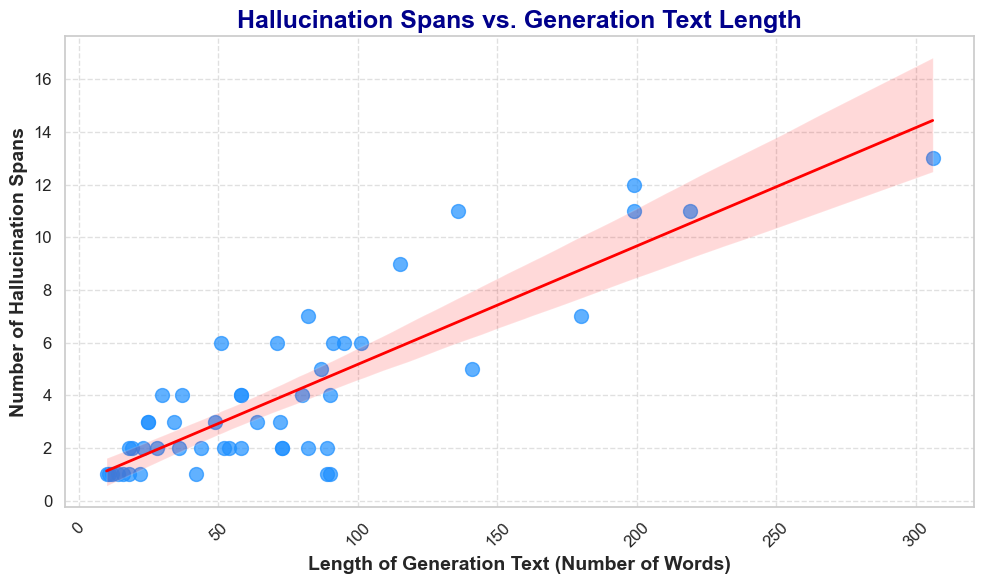

In [15]:
plot_line_chart(val)

### Post-processing
- At the end of some `model_output_text`, there exists extra `<|im_end|>` for the response generated by `occiglot/occiglot-7b-eu5-instruct`

In [16]:
train[train.model_output_text.str.contains('<|im_end|>')].head()

,lang,model_input,model_id,model_output_tokens,model_output_logits,model_output_text
89,FR,Quelle figure historique est parfois associée ...,occiglot/occiglot-7b-eu5-instruct,"[La, ▁lég, ende, ▁de, ▁la, ▁L, lor, ona, ▁est,...","[19.0906791687, 21.578163147, 32.477142334, 23...",La légende de la Llorona est associée à différ...
90,FR,Quelle est la capitale du district de Farrukha...,occiglot/occiglot-7b-eu5-instruct,"[La, ▁capit, ale, ▁du, ▁district, ▁de, ▁Far, r...","[18.0387763977, 24.1310901642, 29.4497013092, ...",La capitale du district de Farrukhabad est Far...
99,FR,En quoi le royaume suève et le royaume de Gali...,occiglot/occiglot-7b-eu5-instruct,"[Le, ▁ro, ya, ume, ▁su, ève, ▁et, ▁le, ▁ro, ya...","[18.6224479675, 23.7133426666, 27.0920391083, ...",Le royaume suève et le royaume de Galice sont ...
100,FR,Pour quelle raison le stade Red Bull à Salzbou...,occiglot/occiglot-7b-eu5-instruct,"[Le, ▁st, ade, ▁Red, ▁Bull, ▁à, ▁Sal, z, bourg...","[17.6692333221, 21.2503910065, 27.8809890747, ...",Le stade Red Bull à Salzbourg a été réaménagé ...
101,FR,Chance the Rapper s’est-t-il déjà produit au s...,occiglot/occiglot-7b-eu5-instruct,"[Non, ,, ▁Ch, ance, ▁the, ▁Rap, per, ▁ne, ▁s, ...","[19.0154323578, 21.6287288666, 21.0292701721, ...","Non, Chance the Rapper ne s'est pas encore pro..."


In [17]:
val[val.model_output_text.str.contains('<|im_end|>')].head()

,id,lang,model_input,model_output_text,model_id,soft_labels,hard_labels,model_output_logits,model_output_tokens,hallucination_spans,hallucination_spans_number,text_length
1,val-fr-2,FR,À quelle société de doublage a été confiée l’a...,La série White Collar a été doublée en françai...,occiglot/occiglot-7b-eu5-instruct,"[{'start': 75, 'prob': 1.0, 'end': 88}]","[[75, 88]]","[16.2417583466, 22.4181919098, 22.1100273132, ...","[La, ▁série, ▁White, ▁Coll, ar, ▁a, ▁été, ▁dou...",[Lylo Doublage],1,16
5,val-fr-6,FR,Les antennes des arthropodes sont-elles toujou...,"Non, toutes les antennes des arthropodes ne so...",occiglot/occiglot-7b-eu5-instruct,"[{'start': 0, 'prob': 0.33333333330000003, 'en...","[[41, 52], [63, 405]]","[20.0168609619, 24.5085029602, 23.6106433868, ...","[Non, ,, ▁toutes, ▁les, ▁anten, nes, ▁des, ▁ar...","[ne sont pas, Les antennes biramées sont carac...",2,58
12,val-fr-13,FR,Quel a été le premier rôle au cinéma de Johnny...,Johnny Cash a fait ses débuts au cinéma en 195...,occiglot/occiglot-7b-eu5-instruct,"[{'start': 43, 'prob': 1.0, 'end': 47}, {'star...","[[43, 47], [62, 79], [187, 207], [212, 216], [...","[16.6689167023, 21.4504795074, 20.7905216217, ...","[John, ny, ▁Cash, ▁a, ▁fait, ▁ses, ▁début, s, ...","[1955, The Long Tomorrow, The Johnny Cash Show...",6,51
13,val-fr-14,FR,Quelles sont les couleurs du Jenis Fýtbol Klýby?,Le Jenis Fýtbol Klýby est un club de football ...,occiglot/occiglot-7b-eu5-instruct,"[{'start': 46, 'prob': 1.0, 'end': 55}, {'star...","[[46, 55], [89, 94]]","[15.829574585, 18.4916782379, 21.3361568451, 2...","[Le, ▁Jen, is, ▁F, ý, t, bol, ▁Kl, ý, by, ▁est...","[chypriote, blanc]",2,18
17,val-fr-18,FR,Qui a mis en musique l’hymne national du Portu...,"L'hymne national du Portugal est ""A Portuguesa...",occiglot/occiglot-7b-eu5-instruct,"[{'start': 61, 'prob': 1.0, 'end': 75}, {'star...","[[61, 75], [79, 83]]","[18.8095436096, 21.0487365723, 23.5666027069, ...","[L, ', h, ym, ne, ▁national, ▁du, ▁Portugal, ▁...","[Luís de Camões, 1572]",2,23


**NOTE**:
- Language to study: EN, ES, FR

**WHAT TO DO**:
- Synthetic annotation (the main point)
- Create baseline with LM (empirical studies) ~ use HuggingFace
   - x-BERT ~ XLMR (each monolingual classifier for each language)
   - LLM as token classifier